#Linear Regression

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

n = 100
X = np.array([i*0.1 for i in range(n)])
y = np.array([i*0.1+np.random.randn() for i in range(n)])
df = pd.DataFrame({"X":X,"y":y})
df.head()


,X,y
0,0.0,-0.175779
1,0.1,1.626652
2,0.2,-0.500286
3,0.3,1.600086
4,0.4,-1.598277


In [ ]:
def linear(X,m):
  y = m*X
  return y

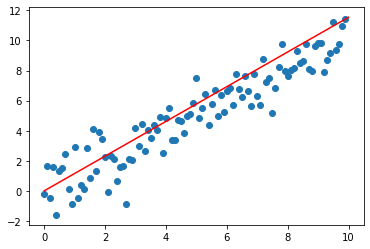

In [ ]:
m_awal = 5
m_pred = m_awal
X_pred = np.array([0,10])
y_pred = linear(X_pred,m_pred)

for i in range(1,n):
  y_pred = linear(X[i], m_pred)
  y_act = y[i]
  error = y_act - y_pred
  delta_m = error/X[i]
  m_pred = m_pred + delta_m
  
y_pred = linear(X_pred,m_pred)
# plt.axis([0,10,0,10])
plt.scatter(X,y)
plt.plot(X_pred,y_pred,"red")
plt.show()

#y = a + bX
## a = y-intercept
## b = slope
## b = Σ(x - x!)(y - y!)/Σ(x - x!)
x! = rata-rata x
y! = rata-rata y



In [ ]:
mean_x = df.X.sum()/df.X.count()
mean_y = df.y.sum()/df.y.count()


## Mencari Slope

In [ ]:

# Mencari slope
# 1. mencari data x-x!
x_ = []
for i in X:
  x_.append(i - mean_x)

# 2. mencari data y-y!
y_ = []
for i in y:
  y_.append(i - mean_y)

# 3. mendari data (x-x!)(y-y!)
x_kali_y = []
for i in range(n):
  x_kali_y.append(x_[i]*y_[i])

# 4. mencari sigma(x-x!)(y-y!)
sigma_x_kali_y = sum(x_kali_y)

# 5. mencari sigma(x-x!)^2
kuadrat_x_ = [i**2 for i in x_]
sigma_kuadrat_x_ = sum(kuadrat_x_)

# 6. masukkan rumus b
b = sigma_x_kali_y/sigma_kuadrat_x_

df_hasil = pd.DataFrame({"(x-x!)":x_,"(y-y!)":y_,"(x-x!)(y-y!)":x_kali_y})


## Mencari intercept

In [ ]:

# Mencari y-intercept
# 1. masukkan rumus y = a + bX
# y = mean_y
# x = mean_x
# jadi -a = bX - y => a = y - bX 
a = mean_y - b*mean_x

y_ = a + b*mean_x

## Membuat fungsi prediksi

In [ ]:
color = "green"
def MyLinearRegression(x):
  y_pred = a + b*x
  plt.plot([x,min(y)],[x,x],color=color,linestyle='dashed')
  plt.plot([x,x],[x,min(y)],color=color,linestyle='dashed')
  plt.scatter(x,y_pred,color=color)
  print(f'Prediksi y untuk x={x} adalah {y_pred}')

## Membuat model evaluasi MEA (Mean Absolute Error) => Sigma(var(fit))


In [ ]:
def mae():
  y_pred = [a + b*i for i in X]
  y_act = y
  mae = sum([abs(y_act[i] - y_pred[i]) for i in range(n)]) / n
  print(f'MAE: {mae}')

## Membuat model evaluasi R-Squared
### R^2 = (var(mean)^2 - var(fit)^2)/var(mean)^2

In [ ]:
def r_squared():
  var_mean = sum([(i - mean_y)**2 for i in y])
  y_pred = [a + b*i for i in X]
  y_act = y
  var_fit = sum([abs((y_act[i] - y_pred[i])**2) for i in range(n)])
  r_squared = (var_mean - var_fit)/var_mean
  print(f'R-Squared: {r_squared}')

## Visualisasi Data

MAE: 0.898321970993926
R-Squared: 0.8769684005884918
Prediksi y untuk x=6 adalah 6.13345377288153


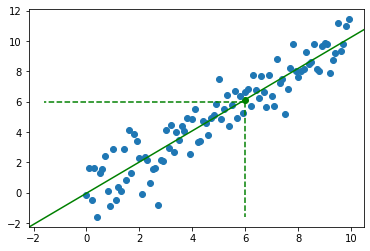

In [ ]:
# intercept adalah suatu titik perpotongan antara suatu garis dengan sumbu Y pada diagram/sumbu kartesius saat nilai X = 0. 
plt.axline((0, a), slope=b, color=color, label='by slope')
# plt.axis([0,10,0,10])
mae()
r_squared()
MyLinearRegression(6)
plt.scatter(X,y)
plt.show()

#Linear Regression menggunakan scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  r2_score
model = LinearRegression()
data_x = np.array(X)
model.fit(np.reshape(data_x,  (-1,1)),np.reshape(y,  (-1,1)))
pred = model.predict([[6]])
y_pred = [a + b*i for i in X]
mae = mean_absolute_error(y,y_pred)
r_sq = r2_score(y,y_pred)
print(mae)
print(r_sq)
print(pred)

0.898321970993926
0.8769684005884918
[[6.13345377]]
